In [2]:
# constant
G=6.67e-11 # Nm^2/Kg^2   Universal Gravitational Constant
#surface values 
rho_0=3000 # [kg/m^3]  density at surface
M_0=6e24 # [kg] earth mass at surface
r_0=6371e3  # [m] mean radius of earth

In [3]:
import numpy as np
# Table 1 from Deshon et al (GJI, 2006)
depths=np.array([0, 5, 9, 13, 16, 20, 25, 30, 35, 40, 50, 65, 90]) 
depths=depths*-1000 # [m] negative(-) downward 
Vp=np.array([5.35, 6.12, 6.12, 6.28, 6.46, 6.72, 7.01, 7.39, 7.55, 8.14, 8.14, 8.26, 8.26])
Vp=Vp*1000 # m/s
Vs= Vp/1.78  # specific to DeShon Paper.
phi = Vp**2 - 4/3 * Vs**2
#print(phi)

In [4]:
rho=np.zeros(len(depths))
M=np.zeros(len(depths))
r=np.zeros(len(depths))
r[0]=r_0
M[0]=M_0
rho[0]=rho_0

In [6]:
i=0
for depth in depths:
    print('Depth= '+str(depth))
    try:
        dr=depths[i+1]-depths[i]
    except:
        break
    d_rho = -G*M[i]*rho[i]/(r[i]**2 * phi[i]) * dr
    #print(depths[i]/-100,Vp[i]/1000, Vs[i]/1000, rho[i])
    i=i+1
    r[i]=r[i-1]+dr
    rho[i] = rho[i-1] + d_rho
    M[i]=4/3*(r[i-1]**3-r[i]**3)*rho[i]

Depth= 0
Depth= -5000
Depth= -9000
Depth= -13000
Depth= -16000
Depth= -20000
Depth= -25000
Depth= -30000
Depth= -35000
Depth= -40000
Depth= -50000
Depth= -65000
Depth= -90000


# Better method, iterating over constant and interpolated dz

In [12]:
from scipy.interpolate import interp1d
import numpy as np

# constant
G=6.67e-11 # Nm^2/Kg^2   Universal Gravitational Constant
#surface values 
rho_0=2700 # [kg/m^3]  density at surface
M_0=6e24 # [kg] earth mass at surface
r_0=6371e3  # [m] mean radius of earth

dr=1000

# Table 1 from Deshon et al (GJI, 2006)
depths=np.array([0, 5, 9, 13, 16, 20, 25, 30, 35, 40, 50, 65, 90]) 
depths=depths*1000 # [m] negative(-) downward 
Vp=np.array([5.35, 6.12, 6.12, 6.28, 6.46, 6.72, 7.01, 7.39, 7.55, 8.14, 8.14, 8.26, 8.26])
Vp=Vp*1000 # m/s

d=range(depths[0],depths[-1],dr)
Vp_int=interp1d(depths,Vp, kind='linear')
Vp_r=Vp_int(d)
Vs_r= Vp_r/1.78  # specific to DeShon Paper.
phi = Vp_r**2 - 4/3 * Vs_r**2

rho=np.zeros(len(d))
r=np.array(d)
r+=int(-r_0)
r=-r

M=M_0
rho[0]=rho_0

dr=-dr # origanally positive for stepping
i=0
#print(i,r[i],Vp_r[i],Vs_r[i],rho[i])
for ri in r:
    i=i+1
    try:
        M=M-4/3*(r[i-1]**3-ri**3)*rho[i-1]
        d_rho = -G*M*rho[i-1]/(ri**2 * phi[i])*dr  
        rho[i]=rho[i-1]+d_rho
        #print(d[i],r[i],Vs_r[i],Vp_r[i],rho[i])
        print(depths[i],rho[i])
    except:
        break

5000 2701.517249300621
9000 2702.954287247468
13000 2704.317332373992
16000 2705.6119761462533
20000 2706.8432600753677
25000 2708.0754913812643
30000 2709.3086710299804
35000 2710.5427999887634
40000 2711.777879226073
50000 2712.9979094856153
65000 2714.203168896998
90000 2715.3939287532653


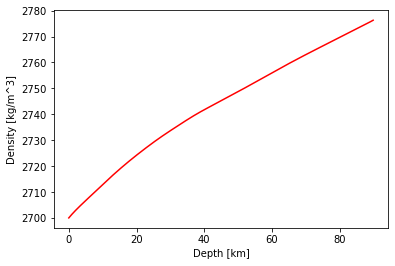

In [95]:
import matplotlib.pyplot as plt
d_km=np.multiply(d,1/1000)
plt.plot(d_km,rho,'r-')
plt.ylabel('Density [kg/m^3]')
plt.xlabel('Depth [km]')
plt.show();

In [66]:
print(ri)

6359000


NameError: name 'rho' is not defined